In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('comments.csv', encoding='utf-8')

In [5]:
df.head()

,Unnamed: 0,author,updated_at,like_count,text,video_id,public
0,0,@abdlkrim9296,2024-07-15T12:07:27Z,0,"i'm not here for apple or review, i'm here for...",cBpGq-vDr2Y,True
1,1,@JasperStaal86,2024-07-14T17:24:11Z,0,What is that fancy weather app at 9:56 👀,cBpGq-vDr2Y,True
2,2,@oneegiiie1490,2024-07-14T06:09:54Z,0,4:56 ✈️ 🏙️,cBpGq-vDr2Y,True
3,3,@hariyanhariyan7556,2024-07-14T04:35:29Z,0,MrBeast ⚡,cBpGq-vDr2Y,True
4,4,@SoulAmatus,2024-07-13T23:15:56Z,0,I have a 7 plus and want to upgrade. I’m hopin...,cBpGq-vDr2Y,True


In [6]:
cols = ['Unnamed: 0', 'author', 'updated_at', 'like_count', 'video_id', 'public']
df.drop(cols, axis = 1)

,text
0,"i'm not here for apple or review, i'm here for..."
1,What is that fancy weather app at 9:56 👀
2,4:56 ✈️ 🏙️
3,MrBeast ⚡
4,I have a 7 plus and want to upgrade. I’m hopin...
...,...
18958,Hiiii
18959,First
18960,loo
18961,Last


In [7]:
!pip install beautifulsoup4 textblob emoji vaderSentiment seaborn
!pip install --upgrade nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00


In [10]:
# Check for missing values in the 'text' column
print(df['text'].isnull().sum())


6


In [11]:
# Fill missing values with an empty string
df['text'].fillna('', inplace=True)


In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from textblob import TextBlob
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('vader_lexicon')


# Function to clean the text
def clean_text(text):

    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.demojize(text)

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])

    return text

# Apply the cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    return sia.polarity_scores(text)

# Apply the sentiment analysis function to the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Extract compound score for simplicity
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Determine sentiment category based on compound score
df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the results
print(df[['text', 'cleaned_text', 'compound', 'sentiment_category']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-12-5303ac9d66f6>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                                    text  \
0      i'm not here for apple or review, i'm here for...   
1               What is that fancy weather app at 9:56 👀   
2                                             4:56 ✈️ 🏙️   
3                                              MrBeast ⚡   
4      I have a 7 plus and want to upgrade. I’m hopin...   
...                                                  ...   
18958                                              Hiiii   
18959                                              First   
18960                                                loo   
18961                                               Last   
18962                                                Sup   

                                            cleaned_text  compound  \
0      im apple review im pro content video audio ani...    0.0000   
1                                 fancy weather app eyes    0.0000   
2                                     airplane cityscape    0.0000   

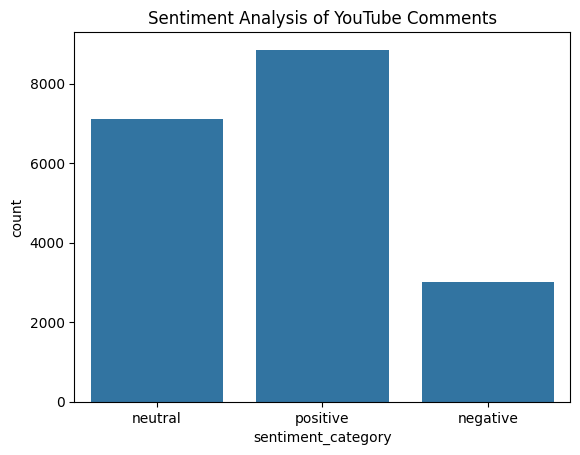

In [13]:
# Visualize the sentiment analysis results
sns.countplot(data=df, x='sentiment_category')
plt.title('Sentiment Analysis of YouTube Comments')
plt.show()

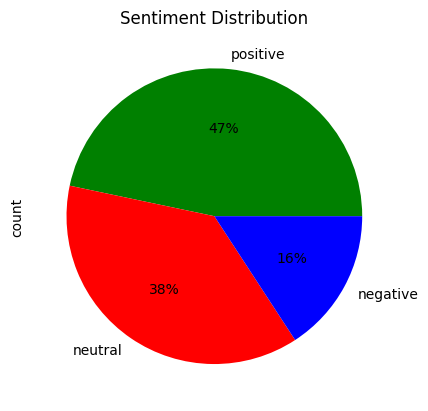

In [14]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.0f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()


In [15]:
positive_comments = df[df['sentiment_category'] == 'positive']['text'].head()
negative_comments = df[df['sentiment_category'] == 'negative']['text'].head()
neutral_comments = df[df['sentiment_category'] == 'neutral']['text'].head()

print("Positive Comments:\n", positive_comments)
print("\nNegative Comments:\n", negative_comments)
print("\nNeutral Comments:\n", neutral_comments)


Positive Comments:
 4     I have a 7 plus and want to upgrade. I’m hopin...
5     I am seriously considering buying it but I was...
11    WHY do these apparently semi-intelligent peopl...
13    Thank you. Your comments are very good and hel...
15    Came here for an iPhone review, left with a fu...
Name: text, dtype: object

Negative Comments:
 12    17:23 entirely disagree. The EUs USB regulatio...
14    I have the 14 pro max. I think I’ll upgrade wh...
18    The intro music and animation and graphics don...
45               I came for the edit in the beginning 🔥
50    Sorry everyone but I think bad language should...
Name: text, dtype: object

Neutral Comments:
 0    i'm not here for apple or review, i'm here for...
1             What is that fancy weather app at 9:56 👀
2                                           4:56 ✈️ 🏙️
3                                            MrBeast ⚡
6                                  Ordered the pro max
Name: text, dtype: object


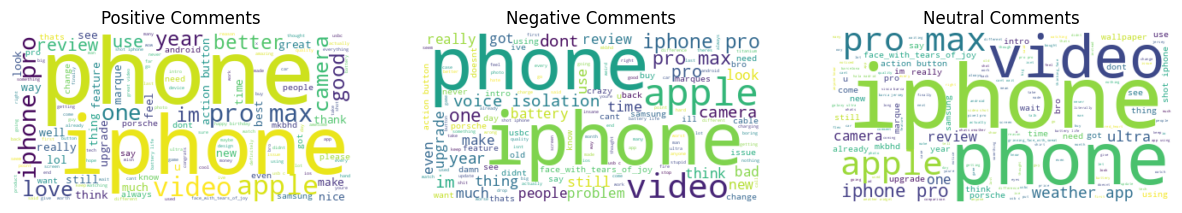

In [16]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment_category'] == 'positive']['cleaned_text'])
negative_text = ' '.join(df[df['sentiment_category'] == 'negative']['cleaned_text'])
neutral_text = ' '.join(df[df['sentiment_category'] == 'neutral']['cleaned_text'])

wordcloud_positive = WordCloud(background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(background_color='white').generate(negative_text)
wordcloud_neutral = WordCloud(background_color='white').generate(neutral_text)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Comments')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Comments')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Comments')
plt.axis('off')

plt.show()


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Vectorize the cleaned text
count_vect = CountVectorizer(stop_words='english')
count_data = count_vect.fit_transform(df['cleaned_text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(count_data)

# Display the topics
no_top_words = 10
display_topics(lda, count_vect.get_feature_names_out(), no_top_words)


Topic 0:
button camera phone iphone action app video like use weather
Topic 1:
pro iphone max phone upgrade apple like new battery year
Topic 2:
video apple review iphone great new shot porsche like nice
Topic 3:
iphone ultra im intro phone pro wallpaper like samsung galaxy
Topic 4:
happy iphone face_with_tears_of_joy birthday battery marques love camera bro lol


In [18]:
# Example: Analyzing sentiment for specific aspects
aspect_terms = ['camera', 'battery', 'design']
for term in aspect_terms:
    aspect_comments = df[df['cleaned_text'].str.contains(term)]
    aspect_sentiment = aspect_comments['compound'].mean()
    print(f'Sentiment for {term}: {aspect_sentiment}')


Sentiment for camera: 0.29204191176470584
Sentiment for battery: 0.17439020217729392
Sentiment for design: 0.3807404624277457


In [19]:
# Example summary
positive_ratio = len(df[df['sentiment_category'] == 'positive']) / len(df)
negative_ratio = len(df[df['sentiment_category'] == 'negative']) / len(df)
neutral_ratio = len(df[df['sentiment_category'] == 'neutral']) / len(df)

print(f'Positive comments: {positive_ratio:.2f}')
print(f'Negative comments: {negative_ratio:.2f}')
print(f'Neutral comments: {neutral_ratio:.2f}')


Positive comments: 0.47
Negative comments: 0.16
Neutral comments: 0.38
